# Computational Physics with Python

### An exploration of how Python can be used to solve problems in physics<br>
#### Code: Adam Grusky  (University of Pittsburgh)<br><br>Problem design:  Dr. Nero (University of Pittsburgh)<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;& Mark Newman's Computational Physics textbook (where noted)<br><br>

## Electron Energy Levels  (Functions & IO)

The energy levels of a single electron atom can be approximated using the formula
$$E_n=-(13.6\ \mbox{eV})\,\frac{Z^2}{n^2}\,,$$
where $Z$ is the atomic number, and $n$ is the principle quantum number (e.g. $n=1$ is the ground state).
Below we demonstrate a function that returns an electron's energy from inputs of Z and n.

In [2]:
# The energy function below acceps Z and n as inputs and returns the value of E_n 

def energy(Z, n):
    
    E_n = -(13.6)*Z**2 / n**2  #eV
    
    return E_n

In [3]:
# We can add the feature of raising errors within our function to validate input values. 
#    The function now requires that Z and n be positive integers

def energy(Z, n):
    
    # check if positive
    if(Z <= 0 or n <= 0):
        raise AssertionError
        
    # check if integers
    if(Z % 1 != 0 or n % 1 != 0):
        raise AssertionError
        
    E_n = -(13.6)*Z**2 / n**2  #eV
    
    return E_n

Below we write a function named `levels(Zmin, Zmax, nmin, nmax)` that calls `energy(Z, n)` repeatedly for a range of values for `Z` and `n`, and prints a table containing the energies. The rows of the table are `Z`, and the columns `n`. The limits for Z and n are inclusive (i.e. they also include `Zmax` and `nmax`).


In [4]:
def levels(Zmin, Zmax, nmin, nmax):
    
    row_string = ""
    for z in range(Zmin,Zmax+1):
        for n in range(nmin, nmax+1):
            row_string = row_string + str(energy(z, n)) + " "
            
        print(row_string)
        row_string = ""

Below we modify `levels` so that it prints a table that is nicely formatted.


In particular, we require:
1. values for `Z` printed in the first column
1. two decimal places
2. columns of equal width so values line up vertically
3. a heading

In [5]:
def levels(Zmin,Zmax,nmin,nmax):
    
    # calculate Zmax with nmin to get the largest number.
    #   then use the lengths when formatting the strings for printout
    E_length = len(str(round(energy(Zmax,nmin), 2))) + 2
    Z_length = len(str(Zmax))
    
    lbl_string = f'{"Z":>{Z_length}}'
    
    for n in range(nmin, nmax+1):
        lbl_string += f'{"n = " + str(n):>{E_length}}'

    print(lbl_string)
    
    for z in range(Zmin,Zmax+1):
        row_string = f'{z:{Z_length}}'
        for n in range(nmin, nmax+1):
            E_n = format(energy(z,n), '.2f')     # call our previously written energy function
            row_string += f'{E_n:>{E_length}}'
            
        print(row_string)
        row_string = ""
        

In [6]:
# We verify that it works with random inputs for Zmin, Zmax, nmin, nmax

from random import randint # imports add additional libraries containing callable functions. 

Zmin = randint(2, 5)
Zmax = randint(11, 13)
nmin = randint(2, 4)
nmax = randint(6, 7)

levels(Zmin, Zmax, nmin, nmax)

 Z   n = 2   n = 3   n = 4   n = 5   n = 6
 2  -13.60   -6.04   -3.40   -2.18   -1.51
 3  -30.60  -13.60   -7.65   -4.90   -3.40
 4  -54.40  -24.18  -13.60   -8.70   -6.04
 5  -85.00  -37.78  -21.25  -13.60   -9.44
 6 -122.40  -54.40  -30.60  -19.58  -13.60
 7 -166.60  -74.04  -41.65  -26.66  -18.51
 8 -217.60  -96.71  -54.40  -34.82  -24.18
 9 -275.40 -122.40  -68.85  -44.06  -30.60
10 -340.00 -151.11  -85.00  -54.40  -37.78
11 -411.40 -182.84 -102.85  -65.82  -45.71


Below we modify `levels` one more time so that it opens a new file named `energy_levels.txt` and writes the values into the file.

We then run `levels` with `Zmin=1`, `Zmax=92`, `nmin=1`, and `nmax=8`.

In [8]:
def levels(Zmin,Zmax,nmin,nmax):
    
    # calculate Zmax with nmin to get the largest number.
    #   then use the lengths when formatting the strings for printout
    E_length = len(str(round(energy(Zmax,nmin), 2))) + 2
    Z_length = len(str(Zmax))
    
    lbl_string = f'{"Z":>{Z_length}}'
    
    for n in range(nmin, nmax+1):
        lbl_string += f'{"n = " + str(n):>{E_length}}'
        
    with open("data/energy_levels.txt",'w+') as fd:    
        fd.write(lbl_string + "\n")
    
        row_string = ""
        for z in range(Zmin,Zmax+1):
            row_string = f'{z:{Z_length}}'
        
            for n in range(nmin, nmax+1):
                E_n = format(energy(z,n), '.2f')
                row_string += f'{E_n:>{E_length}}'
            
            fd.write(row_string + "\n")
            row_string = ""
    

levels(1,40,1,8)

In [10]:
# We can then read the file and show the formatted contents.

with open("data/energy_levels.txt") as file:
    print(file.read())

 Z     n = 1     n = 2     n = 3     n = 4     n = 5     n = 6     n = 7     n = 8
 1    -13.60     -3.40     -1.51     -0.85     -0.54     -0.38     -0.28     -0.21
 2    -54.40    -13.60     -6.04     -3.40     -2.18     -1.51     -1.11     -0.85
 3   -122.40    -30.60    -13.60     -7.65     -4.90     -3.40     -2.50     -1.91
 4   -217.60    -54.40    -24.18    -13.60     -8.70     -6.04     -4.44     -3.40
 5   -340.00    -85.00    -37.78    -21.25    -13.60     -9.44     -6.94     -5.31
 6   -489.60   -122.40    -54.40    -30.60    -19.58    -13.60     -9.99     -7.65
 7   -666.40   -166.60    -74.04    -41.65    -26.66    -18.51    -13.60    -10.41
 8   -870.40   -217.60    -96.71    -54.40    -34.82    -24.18    -17.76    -13.60
 9  -1101.60   -275.40   -122.40    -68.85    -44.06    -30.60    -22.48    -17.21
10  -1360.00   -340.00   -151.11    -85.00    -54.40    -37.78    -27.76    -21.25
11  -1645.60   -411.40   -182.84   -102.85    -65.82    -45.71    -33.58    -25.71
12  

## 2. Plotting Electric Potential (1D, 2D, Scatter, & Contour Plots)

In [8]:
# Useful imports for this section

import numpy as np
import matplotlib.pyplot as plt

The electric potential $V$ of a point charge $q$ as measured at a radial distance $r$ away from it is given by
$$V=k\frac{q}{r}\,,$$
where $V$ has units of volts and $k=8.99\times10^{9}$ V$\cdot$m$\cdot$C$^{-1}$ is the electrostatic constant.

Below we write a function `potential1D(r, q)` that returns the value of $V$ at distance $r$, given a point charge $q$ at the origin.

In [9]:
def potential1D(r, q):
    
    k = 8.99e9 #V*m/C
    
    return k*q/r

Below we use our function to make a 1-D plot of $V(r)$ for $0\le r\le 10$ and $q=-1\times10^{-9}$.

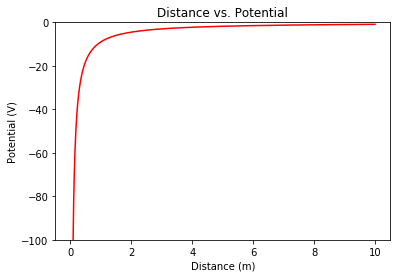

In [10]:
np.seterr(all="ignore") # This can suppress the divide-by-zero errors that might appear

q=-1e-09

r = np.linspace(0,10,1000)

V = np.array(potential1D(r,q))
    
plt.plot(r,V, "red")
plt.title("Distance vs. Potential")
plt.xlabel("Distance (m)")
plt.ylabel("Potential (V)")
plt.ylim(-100,0)

plt.show()

For a point charge $q$ at $(x_0, y_0)$, the electric potential at all other locations in the $xy$-plane is:

$$V(x,y)=k\frac{q}{\sqrt{(x-x_0)^2+(y-y_0)^2}}\,.$$

We create a new function named `potential2D` that it returns $V(x,y)$, given point charge $q$ at $(x_0, y_0)$.

In [11]:
def potential2D(x, y, q, x0, y0):
    
    k = 8.99e9 #V*m/C
    
    V = k*q/((x-x0)**2 + (y-y0)**2)**(1/2)
    
    return V

To visualize this function, we'd like to make a 2-D plot. This is most efficient to do if we can pass arrays for `x` and `y` to `potential2D` and have it return an array of voltages. Note that we still want `q`, `x0` and `y0` to be scalars (i.e. our function is for a single point charge).

To make a 2-D plot, we want to pass `x` and `y` to our function as 2-D arrays. Then, our function will return a 2-D array of voltages that we can plot.

We calculate a 101x101 array of values for the electric potential named `V`, representing $0\le x\le1$ and $0\le y\le1$, $q=1\times10^{-9}$, and $(x_0, y_0) = (0.5, 0.5)$.

In [12]:
q=1e-09
x0 = y0 = 0.5

x = np.linspace(0,1,101)
y = np.linspace(0,1,101)

x, y = np.meshgrid(x, y)

V = potential2D(x,y,q,x0,y0)

We use `imshow()` and `contour` to plot `V` with the following formatting:

- The `seismic` colormap. Showing the colorbar.
- Capping positive values at 100, and negative values at -100.
- Setting the origin the bottom left corner of the plot.
- Ploting black contours on top of your plot, with a contour every 10 volts.
- Labeling the axes of the plot

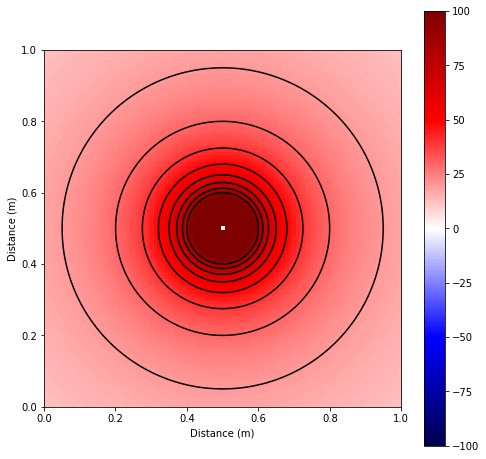

In [13]:
plt.figure(figsize=(8,8))
plt.imshow(V, cmap="seismic",vmin=-100,vmax=100,origin="lower", extent=(0,1,0,1))
plt.xlabel("Distance (m)")
plt.ylabel("Distance (m)")
plt.colorbar()
plt.contour(x,y,V,levels=np.arange(-100,100,10),colors="black")
plt.show()

In cases where there is more than one point charge, the electric potential is given by the sum of the potentials from each point charge. Create a function named `V_plot(q1, x1, y1, q2, x2, y2, q3, x3, y3)` that takes three point charges&mdash;$q_1$ at $(x_1, y_1)$, etc.&mdash;and creates a 2-D plot formatted exactly like in the previous part.

We use `plot` or `scatter` to place a white dot at the location of each point charge.


In [14]:
def V_plot(q1, x1, y1, q2, x2, y2, q3, x3, y3):
    x = np.linspace(0,1,101)
    y = np.linspace(0,1,101)
    x, y = np.meshgrid(x, y)
    V = potential2D(x,y,q1,x1,y1)
    V += potential2D(x,y,q2,x2,y2)
    V += potential2D(x,y,q3,x3,y3)
    plt.figure(figsize=(8,8))
    plt.imshow(V, cmap="seismic",vmin=-100,vmax=100,origin="lower", extent=(0,1,0,1))
    plt.xlabel("Distance (m)")
    plt.ylabel("Distance (m)")
    plt.colorbar()
    plt.contour(x,y,V,levels=np.arange(-100,100,10),colors="black")
    plt.scatter([x1,x2,x3],[y1,y2,y3],10,c="white")
    plt.show()

V_plot(-4.74e-10, 0.99, 0.41,
        7.85e-10, 0.72, 0.70,
        1.37e-09, 0.17, 0.56)


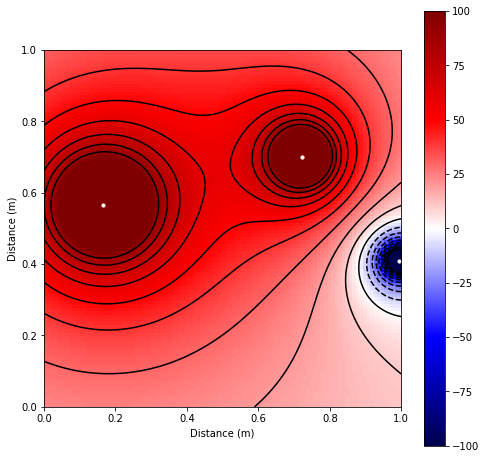

In [15]:
# create a plot using 3 random point charges

import random
q1 = random.uniform(-2e-9, 2e-9)
q2 = random.uniform(-2e-9, 2e-9)
q3 = random.uniform(-2e-9, 2e-9)
x1 = random.uniform(0, 1)
x2 = random.uniform(0, 1)
x3 = random.uniform(0, 1)
y1 = random.uniform(0, 1)
y2 = random.uniform(0, 1)
y3 = random.uniform(0, 1)

# print values for verification
print(f"V_plot({q1:9.2e}, {x1:4.2f}, {y1:4.2f},")
print(f"       {q2:9.2e}, {x2:4.2f}, {y2:4.2f},")
print(f"       {q3:9.2e}, {x3:4.2f}, {y3:4.2f})")
V_plot(q1, x1, y1, q2, x2, y2, q3, x3, y3)

## 3. Waves in 2-D (Plots, Widgets, Animations)

In [16]:
# Useful imports for this section

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython import display
from matplotlib.animation import FuncAnimation

The equation

$$z(x,y) = z_0\sin\Big(k\sqrt{x^2+y^2}-\omega t\Big)$$

describes a circular set of waves centered on the origin that propagate outwards as time progresses. Our task is to create an animated representation of this wave.

In [17]:
def wave(t, z0, k, w):
    x = np.linspace(-15,15,1500)
    y = np.linspace(-15,15,1500)
    
    x,y = np.meshgrid(x,y)
        
    tmp = (x**2+y**2)**(0.5)
    z = z0*np.sin(k*tmp-w*t)
    
    return z

Below we call our function with $z_0=k=\omega=1$ (in appropriate units) and $t=0$. We then use `imshow` to  plot the result.

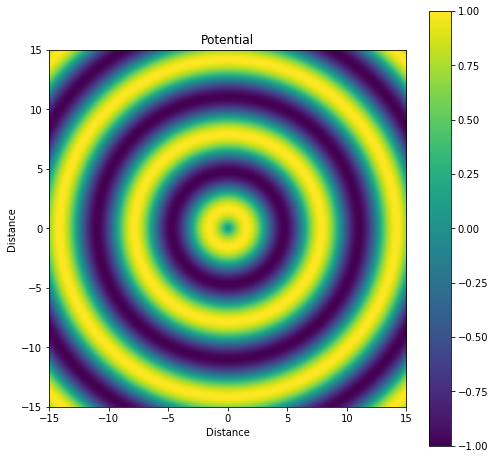

In [18]:
plt.figure(figsize=(8,8))
plt.imshow(wave(0,1,1,1), vmin=-1, vmax=1, extent=(-15,15,-15,15))
plt.title("Potential")
plt.xlabel("Distance")
plt.ylabel("Distance")
plt.colorbar()
plt.show()

We can now attach the values of $z_0$, $k$, and $\omega$ to sliders to see how each variable affects the wave at $t=0$.

In [19]:
def update_plot(z0,k,w):
    plt.figure(figsize=(8,8))
    plt.imshow(wave(0,z0,k,w), origin='lower', extent=(-15,15,-15,15), vmin=-5, vmax=5)
    plt.title("Potential")
    plt.xlabel("Distance")
    plt.ylabel("Distance")
    plt.colorbar()

    
slider_z0 = widgets.IntSlider(min=-5, max=5, step=1, value=5, continuous_update=False)
slider_k = widgets.FloatSlider(min=1,max=5,step=0.5, value=1, continuous_update=False)
slider_w = widgets.FloatSlider(min=1, max=5, step=0.5, value=1, continuous_update=False)

gui = widgets.interactive(update_plot, z0=slider_z0, k=slider_k, w=slider_w)

display.display(gui)

# notice w does not change the plot at t=0

interactive(children=(IntSlider(value=5, continuous_update=False, description='z0', max=5, min=-5), FloatSlide…

Next we create an animation of the wave using test values for z0 and k. Let ω=10 s−1. The animation should run in "real time".

Using widgets to trigger the animation would be too slow. Instead, we hard code values for z0, k, and ω.

In [ ]:
fig = plt.figure(figsize=(8,8))
plt_ims = plt.imshow(wave(1,5,1,10), origin='lower', extent=(-15,15,-15,15), vmin=-5, vmax=5, animated=True)
plt.title("Potential")
plt.xlabel("Distance")
plt.ylabel("Distance")

def animate(frame):
    t=frame/50
    plt_ims.set_array(wave(t,5,1,10))
    return plt_ims

# to run in real time we calculate the frames needed:
#   period T=2*pi/w ---> T=0.628s
#   with an interval of 20 (=50fps) we need 0.628*50=31.4 frames (use 31)
        
anim = FuncAnimation(fig, animate, frames=31, interval=20)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

##  4. Electric Field of a Charge Distribution (1D & 2D Integration, Quiver Plots)

In [21]:
# Useful imports for this section

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

Given a charge distribution, it is often easiest to first find the electric potential
$$V=k\int\frac{dq}{r}\,,$$
and then employ $\vec{E}=-\nabla V$ to find the electric field. For simplicity, we will work in a 2-D plane. In that case, the electric potential will be given by a double-integral:
$$V(x,y)=k\int_{-L}^L\int_{-L}^{L} \frac{\sigma(x^\prime,y^\prime)}{\sqrt{(x-x^\prime)^2+(y-y^\prime)^2}}\,dx^\prime dy^\prime\,,$$
where the 2-D charge distribution $\sigma$ is entirely contained with the region $-L<x<L$ and $-L<y<L$ (in principle, $L$ could be infinite). For convenience, we'll use units where the electrostatic constant $k=1$, and choose $L$ to be "big enough."

The first task is to write a fast 2-D integrator. You might think that `scipy.dblquad` could do the job, but consider what we need to do: To find $\vec E$, we have to create a 2-D array that represents $V(x,y)$. For the gradient to be accurate, this array needs to have a relatively high resolution. To build this array we need to compute a double-integral *for every point* in the array. Each double integral evaluates a 1-D integral *for every point* in another 1-D integral. The main issue with `scipy.dblquad` is that it's setup to call a function. Calling functions in python is slow. It's not so bad when you do it once, but it is when you want to do it 100 million times!

On the other hand, working with arrays is fast. We write a function named `simps2D(f, L)` that takes a function `f(x, y)` and returns the integral using Simpson's rule evaluated from $-L<x<L$ and $-L<y<L$ on a $200\times200$ grid. We assume that `f(x, y)` can accept arrays for `x` and `y` and will return a 2-D array. Note that the function only calls `f(x, y)` once&mdash;otherwise it would be too slow for the later parts of this problem.

In [22]:
def simps2D(f,L):
    x = np.linspace(-L,L,200)
    y = np.linspace(-L,L,200)
    
    X,Y = np.meshgrid(x,y)
    array = f(X,Y)
    
    I = integrate.simps(array, x)
    return integrate.simps(I,y)

Now that we have a fast 2-D integrator, we write a function `potential(sigma, x, y)` that takes a function `sigma(x,y)` that describes a 2-D charge distribution, and returns the electric potential at point $(x,y)$ using
$$V(x,y)=k\int_{-L}^L\int_{-L}^{L} \frac{\sigma(x^\prime,y^\prime)}{\sqrt{(x-x^\prime)^2+(y-y^\prime)^2}}\,dx^\prime dy^\prime\,.$$ We assume that $L=10$ is a "large enough" value for any $\sigma$ (i.e. the charge is always contained within a $20\times20$ square centered on the origin).

In [23]:
def potential(sigma, x, y):
    L = 10 
    x_0 = x
    y_0 = y
    
    v = lambda x,y: sigma(x,y) / np.sqrt((x_0-x)**2+(y_0-y)**2)
    
    I = simps2D(v,L)
    
    return I

For the rest of this problem, we'll use
$$\sigma(x,y) = \sin\left(\frac{\pi\,x}{2}\right)\sin\left(\frac{\pi\,y}{2}\right)\,.$$

We create this function and display it using `imshow` for $-2\le x\le2$ and $-2\le y\le2$.

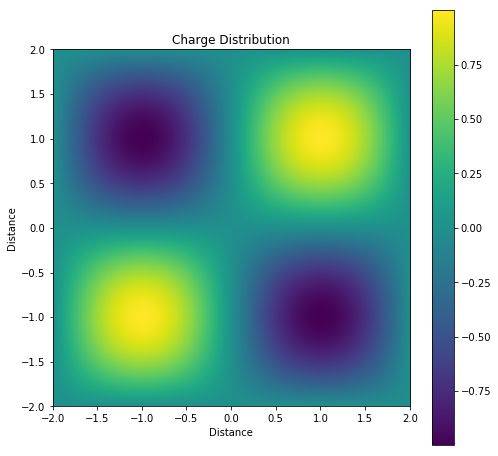

In [24]:
def sigma(x,y):
    return np.sin(np.pi*x/2)*np.sin(np.pi*y/2)

x = np.linspace(-2,2,1000)
y = np.linspace(-2,2,1000)

xx,yy = np.meshgrid(x,y)

array = sigma(xx,yy)

plt.figure(figsize=(8,8))
plt.imshow(array, origin="lower", extent=(-2,2,-2,2))
plt.xlabel("Distance")
plt.ylabel("Distance")
plt.title("Charge Distribution")
plt.colorbar()
plt.show()

The next step is to build a 2-D array of values for $V(x,y)$. Let $-2\le x\le2$ and $-2\le y\le2$, with a grid spacing of 0.05 units. We name the array `V`.

In [25]:
x = np.arange(-2,2.1,.1)
y = np.arange(-2,2.1,.1)

V = np.empty([x.size,y.size])

for j in range(0,y.size):
    for i in range(0,x.size):
        V[i][j] = potential(sigma, x[i], y[j])

We then use `contour` to plot `V`.

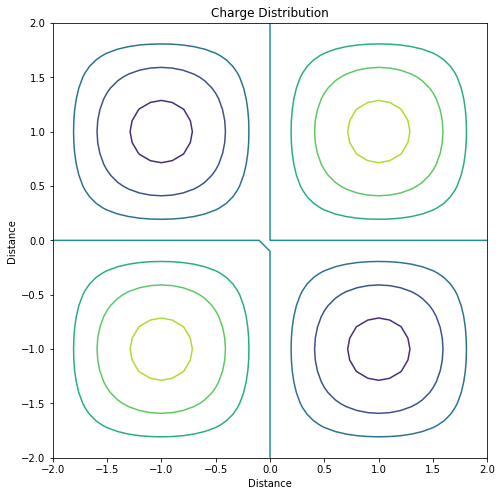

In [26]:
plt.figure(figsize=(8,8))
plt.contour(V, extent=(-2,2,-2,2))
plt.axis("scaled")
plt.title("Charge Distribution")
plt.xlabel("Distance")
plt.ylabel("Distance")
plt.show()

Finally, we use $\vec{E}=-\nabla V$ to find the electric field.

`quiver` is used to plot $\vec{E}$, `contour` to plot $V$, and `imshow` to plot $\sigma$ (all on the same graph). The grid used for `quiver` should be roughly half the resolution as the grid for `contour` (otherwise the graph will look too crowded).


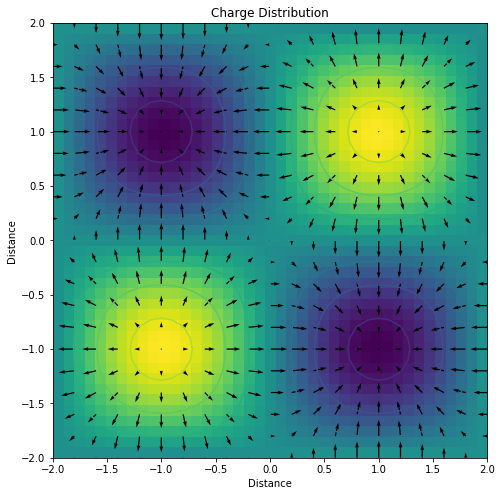

In [27]:
x_range = np.arange(-2,2.1,.1)
y_range = np.arange(-2,2.1,.1)

x,y = np.meshgrid(x_range, y_range)

dvdy, dvdx = np.gradient(-V, .05)

plt.figure(figsize=(8,8))
plt.contour(V, extent =(-2,2,-2,2))

s = 2 # spacing
plt.quiver(x[::s,::s], y[::s,::s], dvdx[::s,::s], dvdy[::s,::s])
plt.imshow(sigma(x,y), extent=(-2,2,-2,2), origin="lower")
plt.title("Charge Distribution")
plt.xlabel("Distance")
plt.ylabel("Distance")
plt.show()

# Note the contours are dim but can be faintly seen

## 5. Eigenfrequencies (Linear Algebra, Drawing & Animating Shapes)

In [28]:
# Useful imports for this section

import numpy as np
import scipy.linalg as linalg
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython import display

Consider a chain of four identical masses connected by five ideal springs. We will neglect the effects of gravity for simplicity. Your task is to make an animation that shows the chain vibrating horizontally at each of its four *eigenfrequencies*.

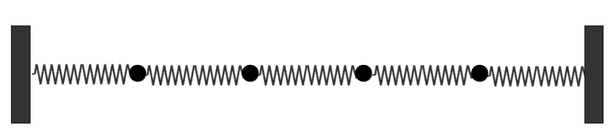

Let $x_0$, $x_1$, $x_2$, and $x_3$ be the horizontal displacement of each mass from equilibrium, numbered from left to right. (For example, in the figure above, $x_0 = x_1 = x_2 = x_3 = 0$. Verify that the potential energy of the chain is
$$U = \tfrac12 k x_0^2 + \tfrac12 k(x_1-x_0)^2 + \tfrac12 k(x_2-x_1)^2 + \tfrac12 k(x_3-x_2)^2 + \tfrac12 k x_3^2\,,$$
where we have one term for each of the five springs.

Using
$$F_i=-\frac{\partial U}{\partial x_i} = m\ddot{x_i}\,,$$
write down the four equations of motion that govern the four masses. 

To find the eigenfrequencies $\omega$ of the system, we exploit the fact that the solution to a simple harmonic oscillator takes the form $\ddot{x_i} = -\omega^2 x_i$.
Put the equations you wrote above into the form
$$\mathbf{Mx}=-\frac{\omega^2}{\omega_0^2}\mathbf{x}\,,$$
where $\mathbf{M}$ is a matrix with the coefficients from the equation of motion and $\omega_0=\sqrt{k/m}$ is the natural frequency of each spring. We'll choose units where $\omega_0 = 1$. We are thus left with an eigenvalue problem!
$$\mathbf{Mx}=-\omega^2\mathbf{x}\,$$
where $\omega$ are the angular *eigenfrequencies* (be careful, they are the square root of the eigenvalues and they should all be real).

We explicity create the array `M` in the cell below.

In [29]:
k = 1
M = np.array([[2*k,  -k,  0,  0],
              [ -k, 2*k, -k,  0],
              [  0,  -k, 2*k,-k],
              [  0,   0,  -k, 2]])

print(M)

[[ 2 -1  0  0]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [ 0  0 -1  2]]


We find the eigenfrequencies and associated eigenvectors for this system and store the four eigenfrequencies in variables named `eigfreq1`, `eigfreq2`, `eigfreq3`, and `eigfreq4` (ordered from smallest to largest). We store the four normalized eigenvectors in four arrays named `eigvec1`, `eigvec2`, `eigvec3`, and `eigvec4` (in the same order as the eigenfrequencies).

In [30]:
eigenvalues, eigenvectors = linalg.eigh(M)

eigenvalues = np.sort(np.sqrt(eigenvalues))

eigfreq1 = eigenvalues[0]
eigfreq2 = eigenvalues[1]
eigfreq3 = eigenvalues[2]
eigfreq4 = eigenvalues[3]

eigvec1 = eigenvectors[:,0]
eigvec2 = eigenvectors[:,1]
eigvec3 = eigenvectors[:,2]
eigvec4 = eigenvectors[:,3]

print("eigenvalue 1:", eigfreq1.round(5), " eigenvector 1:", eigvec1)
print("eigenvalue 2:", eigfreq2.round(5), " eigenvector 2:", eigvec2)
print("eigenvalue 3:", eigfreq4.round(5), " eigenvector 3:", eigvec3)
print("eigenvalue 4:", eigfreq4.round(5), " eigenvector 4:", eigvec4)

eigenvalue 1: 0.61803  eigenvector 1: [0.37174803 0.60150096 0.60150096 0.37174803]
eigenvalue 2: 1.17557  eigenvector 2: [-0.60150096 -0.37174803  0.37174803  0.60150096]
eigenvalue 3: 1.90211  eigenvector 3: [ 0.60150096 -0.37174803 -0.37174803  0.60150096]
eigenvalue 4: 1.90211  eigenvector 4: [-0.37174803  0.60150096 -0.60150096  0.37174803]


Now it's time to create the animation.

Recall that the time-dependent solution to a simple harmonic oscillator is
$$x_i(t) = A_i\sin(\omega t + \phi)\,,$$
where $A_i$ is the amplitude and $\phi$ is the phase. In other words, when the chain is driven at an arbitrary frequency $\omega$, all four masses move with that same frequency, but different amplitudes and phases. In general, the values of these amplitudes and phases are not obvious.

However, if the system is driven at an eigenfrequency, the resulting amplitudes of the four masses are exactly the elements of the associated eigenvector (or more precisely, are proportional to the elements of the eigenvector, since they've been normalized). The phase is either zero (if the element is positive) or $\pi$ (if the element is negative). However, it's easiest to just set $\phi=0$ and instead let the amplitude be positive or negative.

Below we make an animation that shows the chain moving at each of its four eigenfrequencies. 

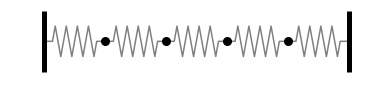

In [31]:
def draw_spring(xi, xf):
    """
    Draws a horizontal spring.
    Inputs: xi = inital x-coordinate
            xf = final x-coordinate
    """
    dy = 0.5
    x = np.linspace(xi, xf, 23)
    y = np.array([0]*4 + [dy, 0, -dy, 0]*4 + [0]*3)
    spring = plt.Line2D(x, y, linestyle="-", color="gray", zorder=-1)
    ax = plt.gca()                      #                        ^
    ax.add_line(spring)                 # draw behind everything else


def draw_chain(x_offsets):
    """
    Draw a chain of five springs and four masses.
            x_offsets = Sequence of displacements from equilibrium position.
    """
    x = np.arange(2, 10, 2) + x_offsets
    
    # draw springs
    draw_spring(0, x[0],)
    draw_spring(x[0], x[1])
    draw_spring(x[1], x[2])
    draw_spring(x[2], x[3])
    draw_spring(x[3], 10)
    
    # draw masses
    plt.plot(x, [0, 0, 0, 0], "ko", ms=8)
    
    # draw verycial edges
    plt.vlines([0, 10], -1, 1, "k", lw=5)
    
# example of an unstretched chain
draw_chain([0, 0, 0, 0])
plt.axis("scaled")
plt.axis("off")
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))

def animate(frame):
    
    fig.clear()

    B = .1 #slows down animation
    
    x0 = eigvec1*np.sin(B*eigfreq1*frame)
    x1 = eigvec2*np.sin(B*eigfreq2*frame)
    x2 = eigvec3*np.sin(B*eigfreq3*frame)
    x3 = eigvec4*np.sin(B*eigfreq4*frame)
    
    #use subplots to plot 4 chains
    plt.subplot(4,1,1)
    draw_chain(x0)
    plt.axis("off")

    plt.subplot(4,1,2)
    draw_chain(x1)
    plt.axis("off")
    
    plt.subplot(4,1,3)
    draw_chain(x2)
    plt.axis("off")
    
    plt.subplot(4,1,4)
    draw_chain(x3)
    plt.axis("off")
    
    progress.progress += 1
    
frames = 200
    
progress = display.ProgressBar(frames)
progress.display()

anim = FuncAnimation(fig, animate, frames = frames, interval = 20)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

## 6. Lagrange Points (Minimization/Maximization)

In [33]:
# Useful imports for this section

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import scipy.optimize as optimize

The [Lagrange points](https://en.wikipedia.org/wiki/Lagrangian_point) are the five points located around a pair of celestial bodies where the net gravitational field is exactly zero as measured in a co-rotating reference frame (i.e. accounting for the non-inertial centrifugal force). Our task is to calculate the five Lagrange points for the Earth-Moon system.

In a reference frame that rotates about the earth-moon system's center of mass, the effective gravitational potential is
$$V=-\frac{GM}{r_E} - \frac{Gm}{r_m} - \tfrac12 r^2 \omega^2\,$$
where $G=6.674\times10^{-11}$ m$^3$kg$^{-1}$s$^{-2}$, $M=5.974\times10^{24}$ kg is the mass of the earth, $m=7.348\times10^{22}$ kg is the mass of the moon, and $\omega=2.662\times10^{-6}$ s$^{-1}$ is the orbital angular frequency of the moon about the earth-moon system's center of mass. Note that the third term above is the *centrifugal force* introduced by working in co-rotating coordinates. The three distances $r_E$, $r_m$, and $r$ are measured from the earth, moon, and center of mass, respectively.

We make a plot with the center of mass at the origin, and with the earth and moon lying along the $x$-axis (shown as dots or circles&mdash;they don't need to be to scale). Set the $x$ and $y$ limits of your graph $-1.2R$ to $1.2R$, where $R=3.844\times10^8$ m is the radius of the moon's orbit. We draw a circle to show the moon's orbit.

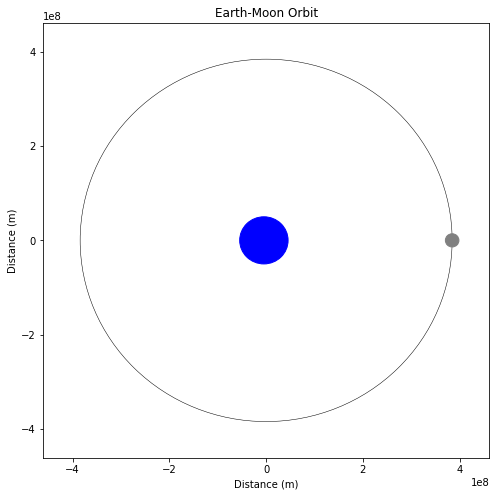

In [34]:
# declare variables used throughout notebook
G = 6.674e-11 #m^3 * kg^-1 * s^-2
M = 5.974e24 # kg
m = 7.348e22 # kg
w = 2.662e-6 # s^-1
R = 3.844e8 # m

# center of mass at (0,0) simplifies equation to obtain R_e and R_m
R_e = (-m*R)/(m+M)
R_m = (M*R)/(M+m)

# create shape objects
earth = plt.Circle((R_e,0), radius = 5e7, color = "blue")
moon = plt.Circle((R, 0), radius = 1.4e7, color = "gray")
moon_circle = plt.Circle((0,0), radius = R,fill = "", color = "black", linewidth = 0.5)

# create plot and add objects
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
ax.add_patch(earth)
ax.add_patch(moon_circle)
ax.add_patch(moon)
#plt.plot(0,0, 'o') uncomment to show center of grav
plt.xlim(-1.2*R, 1.2*R)
plt.ylim(-1.2*R, 1.2*R)
plt.title("Earth-Moon Orbit")
plt.xlabel("Distance (m)")
plt.ylabel("Distance (m)")
fig = plt.show()

We create a function named `potential(x, y)` that returns $V(x,y)$. We calculate the radii as
$$r = \sqrt{x^2 + y^2}\,,$$
$$r_E = \sqrt{(x-x_E)^2 + (y-y_E)^2}\,,$$
and
$$r_m = \sqrt{(x-x_m)^2 + (y-y_m)^2}\,$$
where $(x_E, y_E)$ and $(x_m, y_m)$ are the locations of the earth and moon as plotted in the previous part.

In [35]:
# helper function to calculate r given x and y values
def r(x,y, x0, y0):
    return np.sqrt((x-x0)**2 + (y-y0)**2)

def potential(x,y):
    
    # calulate (x,y) distance from Earth, moon, and CG
    r_E = r(x, y, R_e, 0)
    
    r_m = r(x, y, R_m, 0)
    
    r_s = r(x, y, 0, 0)
    
    # calculate and return V with above distances
    return -G*M/r_E - G*m/r_m - 0.5*r_s**2*w**2

Next we make a contour plot of $V$ on top of the earth-moon system that you previously plotted.

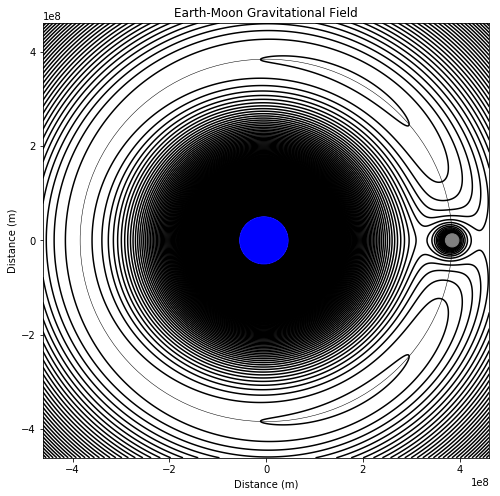

In [36]:
# create x and y arrays
x = np.linspace(-1.2*R, 1.2*R, 1000)
y = np.linspace(-1.2*R, 1.2*R, 1000)

xx,yy = np.meshgrid(x,y)

V = potential(xx,yy)

# plot contours
plt.figure(figsize=(8,8))
levels = np.arange(-7.6e6, -1e6, 1.8e4)
plt.contour(V, extent=(-1.2*R,1.2*R,-1.2*R,1.2*R), levels=levels, colors="black", linestyles="solid", zorder=0)
                                                                            
# create shape objects                                    zorder defines what objects lay on top of others
earth = plt.Circle((R_e,0), radius = 5e7, color = "blue", zorder=10)
moon = plt.Circle((R, 0), radius = 1.4e7, color = "gray", zorder=10)
moon_circle = plt.Circle((0,0), radius = R,fill = "", color = "black", linewidth = 0.5, zorder=1)

# create object plot
ax = plt.gca()
ax.add_patch(earth)
ax.add_patch(moon_circle)
ax.add_patch(moon)
#plt.plot(0,0, 'o') #uncomment to show center of grav
plt.xlim(-1.2*R, 1.2*R)
plt.ylim(-1.2*R, 1.2*R)
plt.title("Earth-Moon Gravitational Field")
plt.xlabel("Distance (m)")
plt.ylabel("Distance (m)")
plt.show()

The gravitation field is given by
$$\vec{F}=-\vec{\nabla}V\,.$$
    The Lagrange points are located at five places where the magnitude of $F$ is zero. We calculate the **magnitude** of the gradient by hand and write a function for it.  The function and a routine from `scipy.optimize` to locate the five Lagrange points. We store these points in five arrays named `L1`, `L2`, `L3`, `L4`, and `L5`. See the Wikipedia for a reference of which point is which.

In [37]:
# return magnitude of F = xterm i^ + yterm j^ 
def F(xy):
    x,y = xy
    
    # d/dx -V
    xterm = -((G*M)*(x-R_e)/((x-R_e)**2 + y**2)**(3/2) + (G*m)*(x-R_m)/((x-R_m)**2 + y**2)**(3/2) - w**2*(x))
    
    # d/dy -V
    yterm = -((G*M)*(y)/((x-R_e)**2 + y**2)**(3/2) + (G*m)*(y)/((x-R_m)**2 + y**2)**(3/2) - w**2*(y))
    
    return np.sqrt(xterm**2 + yterm**2)


# use plot above to find guesses for L1-L5 and find minimums
#   and use Nelder-Mead or Powell minmize method
method = "Nelder-Mead"
xtol = 1e-8
disp = False

guess = (3e8, 0)
res = optimize.minimize(F, guess, method=method, options={'xtol': xtol, 'disp': disp})
L1 = res.x

guess = (4.4e8, 0)
res = optimize.minimize(F, guess, method=method, options={'xtol': xtol, 'disp': disp})
L2 = res.x

guess = (-3.5e8,0)
res = optimize.minimize(F, guess, method=method, options={'xtol': xtol, 'disp': disp})
L3 = res.x

guess = (1.8e8, 2e8)
res = optimize.minimize(F, guess, method=method, options={'xtol': xtol, 'disp': disp})
L4 = res.x

guess = (1.8, -2e8)
res = optimize.minimize(F, guess, method=method, options={'xtol': xtol, 'disp': disp})
L5 = res.x

We then add the five Lagrange points to our plot.

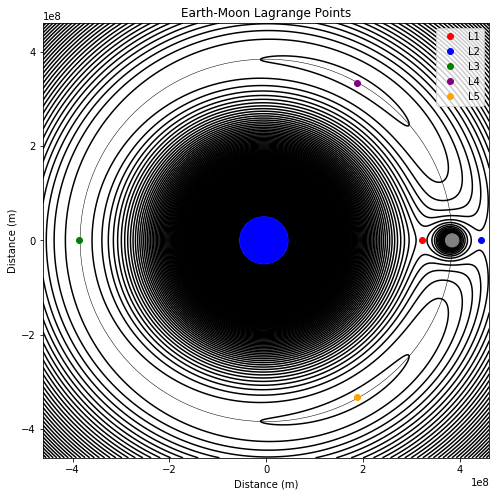

In [38]:
# plot contours
plt.figure(figsize=(8,8))
levels = np.arange(-7.6e6, -1e6, 1.8e4)
plt.contour(V, extent=(-1.2*R,1.2*R,-1.2*R,1.2*R), levels=levels, colors="black", linestyles="solid", zorder=1)

# create shape objects
earth = plt.Circle((R_e,0), radius = 5e7, color = "blue", zorder=1)
moon = plt.Circle((R, 0), radius = 1.4e7, color = "gray", zorder=1)
moon_circle = plt.Circle((0,0), radius = R,fill = "", color = "black", linewidth = 0.5, zorder=0)

# create object plot
ax = plt.gca()
ax.add_patch(earth)
ax.add_patch(moon_circle)
ax.add_patch(moon)
#plt.plot(0,0, 'o') #uncomment to show center of grav
plt.xlim(-1.2*R, 1.2*R)
plt.ylim(-1.2*R, 1.2*R) # increased usual size to see L2 when debugging

# use this to help find guesses
plt.plot(L1[0], L1[1], "o", color="red", label="L1")
plt.plot(L2[0], L2[1], "o", color="blue", label="L2")
plt.plot(L3[0], L3[1], "o", color="green", label="L3")
plt.plot(L4[0], L4[1], "o", color="purple", label="L4")
plt.plot(L5[0], L5[1], "o", color="orange", label="L5")
plt.title("Earth-Moon Lagrange Points")
plt.xlabel("Distance (m)")
plt.ylabel("Distance (m)")
plt.legend()
plt.show()

## 7. Fourier Transform of Sound (Fourier Transforms)

In [39]:
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as display
import scipy.fftpack as fftpack


We load text from a file named `trumpet.txt`. It contains the waveform of a trumpet playing the note C$_5$ (with a frequency of 523.251 Hz).

We calculate the Fourier transform of the trumpet's waveform, and plot the **power spectrum** of the Fourier coefficients ($|c_k|^2$) for frequencies between zero and 4000 Hz. We can see that there are peaks at multiples 523.251 Hz (these are the **harmonics**.)

A good way to check the spacing is to plot several vertical lines using `pyplot.vlines`, spaced at multiples of 523.251 Hz.

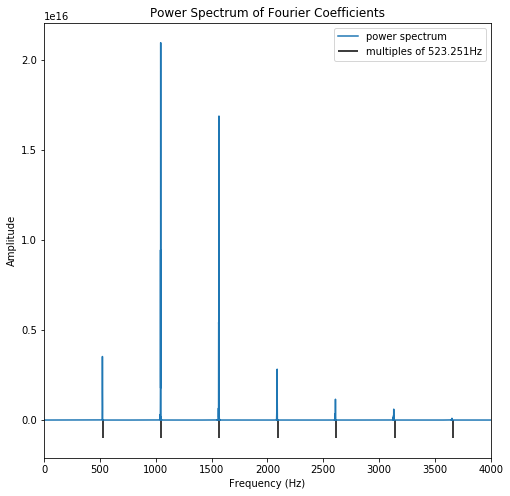

In [ ]:
# load trumpet.txt into numpy array
trumpet = np.loadtxt("data/trumpet.txt")

# take fast fourier transform of array
c = fftpack.fft(np.array(trumpet))
power_spectrum = abs(c)**2

# calculate x-axis scaling. We know it was recorded at 44100 samples per second
fs = 44100
n = len(trumpet)
f = np.arange(0,n,1)*fs/n

harm = 523.251
plt.figure(figsize=(8,8))
plt.plot(f, power_spectrum, label="power spectrum")
plt.vlines([harm, 2*harm, 3*harm, 4*harm, 5*harm, 6*harm, 7*harm], 
                       -.1e16, 0, linestyles="solid", label="multiples of 523.251Hz")
plt.legend()
plt.title("Power Spectrum of Fourier Coefficients")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0,4000)
plt.show()

In [ ]:
display.Audio("data/Starwars.wav")

What chord is played at the beginning of the *Star Wars* theme?

- We load the .wav file into an array. This can be done using
```
from scipy.io.wavfile import read as wavread
rate, data = wavread("Star Wars.wav")
```
where `rate` will be 44100 and `data` will be an array that holds the waveform.


- We only want to work with the first note, so we crop the rest of the file (using array slicing). We also want to cut out the period of silence at the beginning.


- `Audio` is used to verify that only the first note is played.

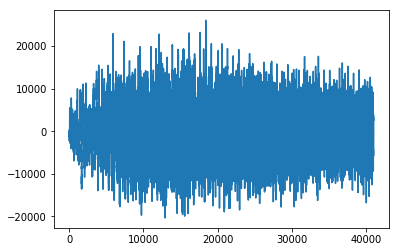

In [ ]:
from scipy.io.wavfile import read as wavread
rate, data = wavread("data/Starwars.wav")

data = data[19000:60000]

plt.plot(data)
plt.show()

display.Audio(data, rate=44100)

- Like we did for the trumpet, the power spectrum is plotted for the first chord in the *Star Wars* theme. The frequencies ranging from zero to 2000 Hz are shown.


- Looking up the [frequencies for each note](https://en.wikipedia.org/wiki/Piano_key_frequencies), we identify as many as we can and mark them on the power-spectrum below.


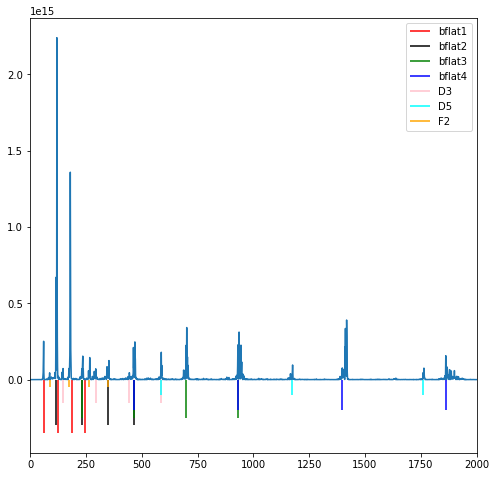

In [ ]:
c = fftpack.fft(np.array(data))
power_spectrum = abs(c)**2

fs = rate
n = len(data)
f = np.arange(0,n,1)*fs/n

bflat1 = 61.73541
bflat2 = 116.5409
bflat3 = 233.0819
bflat4 = 466.1638
F2 = 87.30706
D3 = 146.8324
D5 = 587.3295

plt.figure(figsize=(8,8))
plt.plot(f, power_spectrum)
plt.xlim(0,2000)

plt.vlines([bflat1, 2*bflat1, 3*bflat1, 4*bflat1], -.35e15, 0, color="red", label="bflat1", zorder=1)
plt.vlines([bflat2, 2*bflat2, 3*bflat2, 4*bflat2], -.3e15, 0, color="black", label="bflat2", zorder=2)
plt.vlines([bflat3, 2*bflat3, 3*bflat3, 4*bflat3], -.25e15, 0, color="green", label="bflat3", zorder=3)
plt.vlines([bflat4, 2*bflat4, 3*bflat4, 4*bflat4], -.2e15, 0, color="blue", label="bflat4", zorder=4)

plt.vlines([D3, 2*D3, 3*D3, 4*D3], -.15e15, 0, color="pink", label="D3", zorder=5)
plt.vlines([D5, 2*D5, 3*D5, 4*D5], -.1e15, 0, color="cyan", label="D5", zorder=6)
plt.vlines([F2, 2*F2, 3*F2, 4*F2], -.05e15, 0, color="orange", label="F2", zorder=7)

# use the following to find additional notes.
#find = 587.32
#plt.vlines([find, 2*find, 3*find, 4*find], -.4e15, 0, color="black", label="F2", zorder=7)

plt.legend()
plt.show()

##  8. Double Pendulum (Ordinary Differential Equations)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from IPython import display

(Adapted from Mark Newman Computational Physics textbook exercise 8.15)

A double pendulum consists of a normal pendulum with another pendulum hanging from its end. For simplicity let us ignore friction, and assume that both pendulums have bobs of the same mass $m$ and massless arms of the same length $\ell$. Thus the setup looks like this:

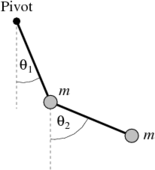

The position of the arms at any moment in time is uniquely specified by the two angles $\theta_1$ and $\theta_2$.  The equations of motion for the angles are most easily derived using the Lagrangian formalism. The resulting pair of equations are
$$\begin{align}
2\ddot\theta_1 + \ddot\theta_2 \cos(\theta_1-\theta_2) &+ \dot\theta_2^2 \sin(\theta_1-\theta_2) + 2{g\over\ell} \sin\theta_1 = 0\,,\\
\ddot\theta_2 + \ddot\theta_1 \cos(\theta_1-\theta_2) &- \dot\theta_1^2 \sin(\theta_1-\theta_2) + {g\over\ell} \sin\theta_2 = 0\,.
\end{align}$$

These are second-order equations, but we can convert them into first-order ones by the usual method, defining two new variables, $\omega_1$ and $\omega_2$, thus:
$$\dot\theta_1 = \omega_1,\qquad \dot\theta_2 = \omega_2\,.$$
In terms of these variables our equations of motion become
$$\begin{align}
2\dot\omega_1 + \dot\omega_2 \cos(\theta_1-\theta_2) &+ \omega_2^2 \sin(\theta_1-\theta_2) + 2{g\over\ell} \sin\theta_1 = 0\,,\\
\dot\omega_2 + \dot\omega_1 \cos(\theta_1-\theta_2) &- \omega_1^2 \sin(\theta_1-\theta_2) + {g\over\ell} \sin\theta_2 = 0\,.
\end{align}$$
Finally we have to rearrange these into the standard form with a single derivative on the left-hand side of each one, which gives

$$\begin{align*}
\dot\omega_1 &= - {\omega_1^2\sin(2\theta_1-2\theta_2) + 2\omega_2^2\sin(\theta_1-\theta_2) + (g/\ell) \bigl[ \sin(\theta_1-2\theta_2) + 3 \sin\theta_1 \bigr]\over 3 - \cos(2\theta_1-2\theta_2)}, \\ \\
\dot\omega_2 &= {4\omega_1^2\sin(\theta_1-\theta_2) + \omega_2^2\sin(2\theta_1-2\theta_2) + 2(g/\ell) \bigl[ \sin(2\theta_1-\theta_2) - \sin\theta_2 \bigr]\over 3 - \cos(2\theta_1-2\theta_2)}.
\end{align*}$$

(If you want to try it yourself, this last step involves some trigonometric identities.

These two equations, along with the equations $\dot{\theta}_1=\omega_1$ and $\dot{\theta}_2=\omega_2$, give us four first-order equations which between them define the motion of the double pendulum.

Below we write a program to solve the equations of motion from $t=0$ to $t=60$ seconds for the case where $\ell=40\,$cm, with the initial conditions $\theta_1=\theta_2=90^\circ$ and $\omega_1=\omega_2=0$. Store the values of $\theta_1$, $\theta_2$, $\omega_1$, and $\omega_2$ in arrays named `th1`, `th2`, `w1`, and `w2`.

In [ ]:
# RK4 - Runge Kutta method
def RK4(f, r, t, h):
    k1 = h*f(r, t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3, t+h)
    return r + 1/6*(k1 + 2*k2 + 2*k3 + k4)

def f(r,t):
    th1, th2, w1, w2 = r
    fth1 = w1
    fth2 = w2
    fw1 = -(w1**2*np.sin(2*th1-2*th2) + 2*w2**2*np.sin(th1-th2) + (g/l)*(np.sin(th1-2*th2) + 3*np.sin(th1)))/(3-np.cos(2*th1-2*th2))
    fw2 = (4*w1**2*np.sin(th1-th2) + w2**2*np.sin(2*th1-2*th2) + 2*(g/l)*(np.sin(2*th1-th2)-np.sin(th2)))/(3-np.cos(2*th1-2*th2))
    return np.array([fth1, fth2, fw1, fw2])

h = .0005
time = np.arange(0,60,h)

l = .40
g = 9.8065
th1 = []
th2 = []
w1 = []
w2 = []

r = [np.pi/2, np.pi/2, 0, 0]  #initial values

for t in time:
    th1.append(r[0])
    th2.append(r[1])
    w1.append(r[2])
    w2.append(r[3])
    r = RK4(f, r, t, h)

th1 = np.array(th1)
th2 = np.array(th2)
w1 = np.array(w1)
w2 = np.array(w2)    

We make a graph of $\theta_1(t)$ and $\theta_2(t)$. This chaotic system may give different results on different machines due to rounding.

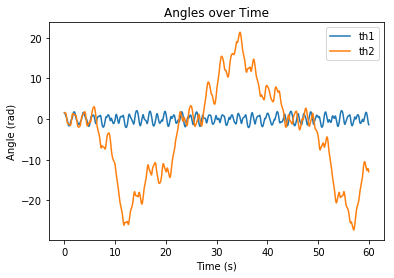

In [ ]:
plt.plot(time, th1, label="th1")
plt.plot(time, th2, label="th2")
plt.title("Angles over Time")
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.legend()
plt.show()

The mechanical energy of the system is given by
$$E = m\ell^2 \bigl[ \omega_1^2 + \tfrac12 \omega_2^2 + \omega_1\omega_2 \cos(\theta_1-\theta_2) \bigr] - mg\ell(2\cos\theta_1 + \cos\theta_2)\,.$$

We calculate the total energy of the system assuming that the mass of the bobs is $1\,$kg each, and make a graph of energy as a function of time from $t=0$ to $t=100$ seconds. Store the energy in an array named `E`.

Because of energy conservation, the total energy should be constant over time (in this case, it should be zero), but you will find that it is not perfectly constant because of the approximate nature of the solution of the differential equation. We choose a suitable value of the step size to ensure that the variation in energy is less than $10^{-5}$ Joules over the course of the calculation.


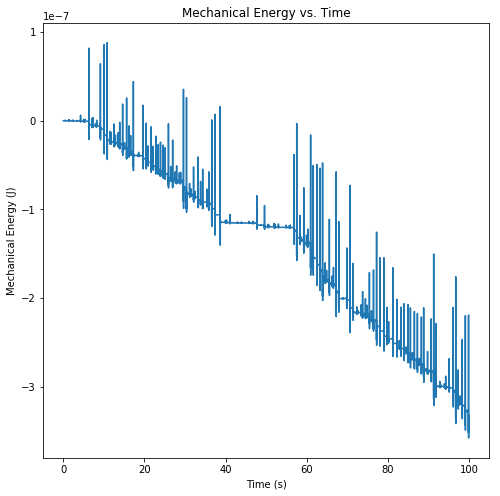

In [ ]:
h = .001
time = np.arange(0,100, h)
l = .40
g = 9.8065
th1 = []
th2 = []
w1 = []
w2 = []

r = [np.pi/2, np.pi/2, 0, 0]  #initial values

for t in time:
    th1.append(r[0])
    th2.append(r[1])
    w1.append(r[2])
    w2.append(r[3])
    r = RK4(f, r, t, h)

th1 = np.array(th1)
th2 = np.array(th2)
w1 = np.array(w1)
w2 = np.array(w2) 

m = 1 #kg
E = m*l**2*(w1**2 + 0.5*w2**2 + w1*w2*np.cos(th1-th2))-m*g*l*(2*np.cos(th1) + np.cos(th2))

# calculate variation in energy
E_max = max(abs(E))
E_min = min(abs(E))
if(E_max - E_min > 10e-5):
    print("Variation in energy greater than 1e-5 detected: ", E_max-E_min)

plt.figure(figsize=(8,8))
plt.plot(time, E)
plt.title("Mechanical Energy vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Mechanical Energy (J)")
plt.show()

Next we make an animation of the motion of the double pendulum that moves in real time.

In [ ]:
L = 0.5 # set length of pendulums   
def update_coords(frame):
    """"
    label coordinates like this
      _________________________
       __x       / (x0,y0)    
      |         /
      |        /
      -y      / 
             /
            o (x1,y1)
             \
              \
               \  
                \
                 o (x2,y2)
    
    """
    
    step = int(frame*stride)
    
    # get current angles
    theta1 = th1[step]
    theta2 = th2[step]
    
    # x0,y0 always at origin
    x0 = y0 = 0
    
    # x1 = L*sin(theta1)   &   y1 = L*cos(theta1)
    x1 = L*np.sin(theta1)
    y1 = -L*np.cos(theta1)
    
    # x2 = x1+L*sin(theta2)   &   y2 = y1+L*cos(theta2) 
    x2 = x1 + L*np.sin(theta2)
    y2 = y1 - L*np.cos(theta2)
    
    X = x0,x1,x2
    Y = y0,y1,y2
    
    return X,Y

def animate(frame):
    progress.progress = frame+1 # update progress
    # get coords
    X, Y = update_coords(frame)
    pendulum.set_data(X, Y)
    
fig = plt.figure(figsize=(8,8))    
pendulum, = plt.plot([], "k-o")
plt.axis("scaled")
plt.axis("off")
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 0.6)

# we skip stride amount of theta values at a time to cover whole array
stride = 10000//200  

# 1000/30 = 33.33fps * 60s = 2000 frames
progress = display.ProgressBar(2000)
progress.display()

anim = FuncAnimation(fig, animate, frames=2000, interval=30)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

## 9. Standing Waves on a String (Partial Differential Equations)

In [ ]:
# Useful imports for this section are

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded
from matplotlib.animation import FuncAnimation
import IPython.display as display

An interesting feature of the wave equation is the phenomena of **standing waves**. In the case of a wave on a string, waves of wavelength $\lambda_n=2L/n$ reflect constructively off of each end of the string, producing a fixed spatial pattern. One way to create these standing waves is to drive one end of the string at a resonant frequency
$$\omega=\frac{n\pi v}{L}\,,$$
where $n$ is a positive integer.

We've already written code to simulate a vibrating string in lecture, and it's a relatively small changed to add in driving term of the form
$$y(0,t)=y_0\sin(\omega t)\qquad\mbox{and}\qquad v_y(0,t)=y_0\omega\cos(\omega t)\,.$$
However, there's a rather significant problem: the amplitude of the resulting wave grows without limit when driven at a resonant frequency! This is not an issue of numerical instability. It is a feature of the wave equation.

Below we simulate a string with length $L=1$ m, wave speed $v=10$ m/s, and driving amplitude $y_0=0.01$ m using the Crank-Nicolson method (the spectral method won't work with time-dependent boundary conditions). Starting with the string horizontal and at rest, we drive one end of the string at $\omega=3\pi v/L$ for 10 seconds, using a spacing $a=10^{-3}$ for 1001 grid points for $x$, and a spacing $h=10^{-3}$ for 10,001 grid points for $t$. We save the final shape of the wave $y(x,10)$ in an array named `wave_part1`.

In [ ]:
L, v, N = 1, 10, 1000
a = 1e-3
x = np.arange(0, L+a, a)

h = 1e-3
time = np.arange(0, 10+h, h)

# inital conditions for y and vy
v = 10 # m/s
w = 3*np.pi*v/L
y0 = 0.01 #m
y = np.zeros(N+1)
vy = np.zeros(N+1)

A2 = -0.25*h**2*v**2/a**2
A1 = 1 + 0.5*h**2*v**2/a**2
A = np.empty((3, N-1))
A[0] = A2
A[1] = A1
A[2] = A2

b1 = 1 - 0.5*h**2*v**2/a**2
b2 = 0.25*h**2*v**2/a**2

shape = []
for i, t in enumerate(time):
    shape.append(y.copy())
    y_old = y.copy()
    y[0] = y0*np.sin(w*t)
    b = b1*y[1:N] + b2*(y[0:N-1] + y[2:N+1]) + h*vy[1:N]
    
    y[1:N] = solve_banded((1,1), A, b)
    vy[0] = y0*w*np.cos(w*t)
    vy[1:N] += 0.5*h*v**2/a**2*(y[0:N-1] - 2*y[1:N] + y[2:N+1] + y_old[0:N-1] - 2*y_old[1:N] + y_old[2:N+1])

wave_part1 = shape[-1]

Plot the shape of the string every tenth of a second for 10 seconds. A nice way to do this is to draw all of the plots on the same axes, with the parameter `alpha=0.2` (or any value between 0 and 1) added to each of your plots to make them partially transparent. You should use the same color for every plot. The amplitude won't diverge in just 10 seconds, but you should see that it's growing linearly.

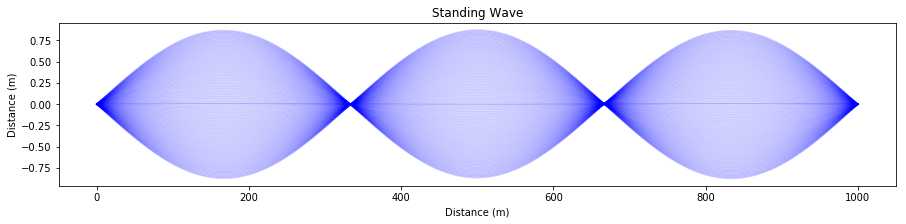

In [ ]:
fig = plt.figure(figsize=(15,3))

for i, t in enumerate(time):
    if i % 100 == 0:
        plt.plot(shape[i], alpha=0.2, color="blue")

plt.title("Standing Wave")
plt.xlabel("Distance (m)")
plt.ylabel("Distance (m)")
plt.show()

# we can see the amplitude increases linearly
# 
# animate this wave by going straight to last block of the section

A more realistic treatment of this system is to add a damping term to the wave equation:
$$\frac{\partial^2y}{\partial t^2}=v^2\frac{\partial^2 y}{\partial x^2} - b\frac{\partial y}{\partial t}\,,$$
where $b$ is the damping coefficient.

We repeeat the previous simulation with a damping coefficient of $b=1$ m$^2$s$^{-2}$. This requires a much bigger change to the code, since we'll be using a different differential equation. The string is simulated for 10 seconds using the same values for $a$ and $h$ as before.

In [ ]:
L, v, N = 1, 10, 1000
a = 1e-3
x = np.arange(0, L+a, a)

h = 1e-3
time = np.arange(0, 10+h, h)

# inital conditions
d = 1 # m^2/s^2   damping term
v = 10 # m/s
w = 3*np.pi*v/L
y0 = 0.01 #m
y = np.zeros(N+1)
vy = np.zeros(N+1)

A2 = (-0.25*h**2*v**2/a**2)
A1 = (1 + 0.5*h**2*v**2/a**2) - 0.25*(-d*h - d**2*h**2)
A = np.empty((3, N-1))
A[0] = A2
A[1] = A1
A[2] = A2

b1 = (1 - 0.5*h**2*v**2/a**2) - 0.25*(d*h + d**2*h**2)
b2 = (0.25*h**2*v**2/a**2)

shape = []
for i, t in enumerate(time):
    shape.append(y.copy())
    y_old = y.copy()
    y[0] = y0*np.sin(w*t)
    b = b1*y[1:N] + b2*(y[0:N-1] + y[2:N+1]) + (h-d*h**2)*vy[1:N]
    
    y[1:N] = solve_banded((1,1), A, b)
    vy[0] = y0*w*np.cos(w*t)
    
    vy[1:N] = (1-0.5*d*h)*vy[1:N] + 0.5*h*v**2/a**2*(y[0:N-1] - 2*y[1:N] + y[2:N+1] + y_old[0:N-1] - 2*y_old[1:N] + y_old[2:N+1])

wave_part2 = shape[-1]

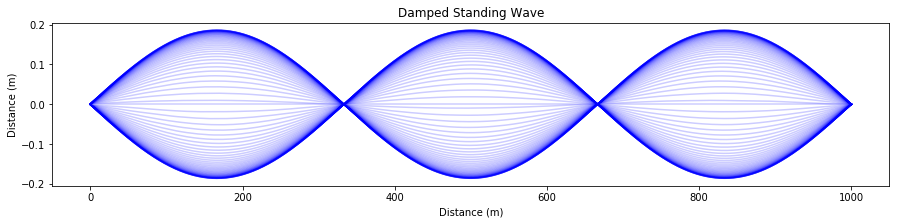

In [ ]:
fig = plt.figure(figsize=(15,3))

for i, t in enumerate(time):
    if i % 100 == 0:
        plt.plot(shape[i], alpha=0.2, color="blue")

plt.title("Damped Standing Wave")
plt.xlabel("Distance (m)")
plt.ylabel("Distance (m)")
plt.show()

# we can see the amplitude stabilizes at .18
# 
# animate this wave by going straight to last block

Now we consider the case where the driving frequency is itself time-dependent by letting $\omega=2\pi t$. The string is animated for the first 10 seconds.

In [ ]:
# turn damping off?
#d=0

# clear arrays 
y = np.zeros(N+1)
vy = np.zeros(N+1)
shape = []

for i, t in enumerate(time):
    w = 2*np.pi*t
    shape.append(y.copy())
    y_old = y.copy()
    y[0] = y0*np.sin(w*t)
    b = b1*y[1:N] + b2*(y[0:N-1] + y[2:N+1]) + (h-d*h**2)*vy[1:N]
    
    y[1:N] = solve_banded((1,1), A, b)
    vy[0] = y0*w*np.cos(w*t)
    
    vy[1:N] = (1-0.5*d*h)*vy[1:N] + 0.5*h*v**2/a**2*(y[0:N-1] - 2*y[1:N] + y[2:N+1] + y_old[0:N-1] - 2*y_old[1:N] + y_old[2:N+1])


In [ ]:
stride = 10 #change stride to include more/less frames

frames = len(shape[::stride])

fig = plt.figure(figsize=(12,4))
line, = plt.plot([], linewidth=3)
plt.axis(xmin=0, xmax=L, ymin=-.2, ymax=.2)
plt.title("Standing Wave - Time Dependent Frequency")
plt.xlabel("Distance (m)")
plt.ylabel("Distance (m)")

def animate(frame):
    y = shape[frame*stride]
    line.set_data(x, y)
    progress.progress += 1

progress = display.ProgressBar(frames)
progress.display()

anim = FuncAnimation(fig, animate, frames=frames, interval=20)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

## 10. Ising Model of Magnetism (Markov Chain Monte Carlo)

In [ ]:
# Useful imports for this section are

import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation
import IPython.display as display

(Adapted from Mark Newman Computational Physics textbook exercise 10.9)

The Ising model is a theoretical model of a magnet. The magnetization of a magnetic material is made up of the combination of many small magnetic dipoles spread throughout the material. If these dipoles point in random directions then the overall magnetization of the system will be close to zero, but if they line up so that all or most of them point in the same direction then the system can acquire a macroscopic magnetic moment - it becomes magnetized.  The Ising model is a model of this process in which the individual moments are represented by dipoles or "spins" arranged on a grid or lattice:

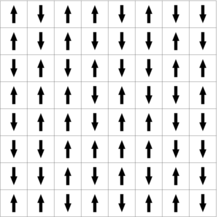

The spins themselves, in this simple model, are restricted to point in only two directions, up and down. Mathematically the spins are represented by variables $s_i=\pm1$ on the points of the lattice, $+1$ for up-pointing
spins and $-1$ for down-pointing ones.  Dipoles in real magnets can typically point in any spatial direction, not just up or down, but the Ising model, with its restriction to just the two directions, captures a lot of the important physics while being significantly simpler to understand.

Another important feature of many magnetic materials is that the individual dipoles in the material may interact magnetically in such a way that it is energetically favorable for them to line up in the same direction.  The
magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_is_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_is_j$, where $J$ is a positive interaction constant, which we will set equal to 1 for simplicity. The minus sign ensures that the interactions are *ferromagnetic*, meaning the energy is lower when dipoles are lined up.  A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$E = -\sum_{<ij>} s_i s_j\,,$$
where the notation $<ij>$ indicates a sum over **unique** pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts. You'll notice that spins at the edges of the lattice have less than four neighbors. A convenient way to handle this issue is to the make the lattice be **periodic**. That is, treat the leftmost spins as adjacent to the rightmost spins, and the topmost adjacent to the bottommost. This approach is a way to approximate the effect of spins that are outside of the lattice.

We write a program to perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of $20\times20$ spins. We will need to set up variables to hold the value $\pm1$ of the spin on
each lattice site, using a two-dimensional integer array, and then take the following steps:

First a function named `energy(spins)` takes a 2-D array of spins and calculates the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, we go through every pair of adjacent spins and add up the contributions $s_ is_j$ from all of them, then multiply by $-1$.

In [ ]:
def energy(s):
    J = 1
    s_right = np.roll(s, -1, axis=1)
    s_bottom = np.roll(s, 1, axis=0)

    sum1 = np.sum(s*s_right)
    sum2 = np.sum(s*s_bottom)

    return -J*(sum1+sum2)

In [ ]:
N = 20
steps = 100000
k = 1

spins = []
M_history = [] # magnetization history
s_history = [] # spin history

spins = np.zeros((N,N), int)
for i in range(N):
    for j in range(N):
        spins[i,j] = random.choice([-1,1])
        
original_spins = spins.copy()

# define as a function to try differnt T values later
def simulate(T): 
    
    # clear global variables -- this lets us compare same starting spin arrangement for T=2,3
    global M_history, s_history, spins, original_spins
    M_history = []
    s_history = []
    
    spins = original_spins.copy()
    
    M = np.sum(steps)

    # begin steps
    for step in range(steps):
        i = random.randrange(0,N)
        j = random.randrange(0,N)

        E_old = energy(spins)
        spins[i,j] *= -1
        E_new = energy(spins)
    
        if E_new > E_old: # E_new > E_old so possibility of acceptance
            if random.random() < np.exp(-(E_new-E_old)/(k*T)):
                E_old = E_new
                M = np.sum(spins)
            else: 
                spins[i,j] *= -1 #change back
            
        else: # E_old >= E_new so accept change
            E_old = E_new
            M = np.sum(spins)
        
        M_history.append(M/N**2)
    
        if(step % 200 == 0):
            s_history.append(spins.copy())
            
simulate(T=1)

The function is now used as the basis for a Metropolis-style simulation of the Ising model with temperature $T=1$ in units where the Boltzmann constant $k_B$ is also $1$. Initially we set the spin variables randomly to $\pm1$, so that on average about a half of them are up and a half down, giving a total magnetization of roughly zero.  Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula,

$$P_{i\to j} = \Bigg\lbrace\begin{array}{ll}
           1 &\qquad\mbox{if $E_j \le E_i$,} \\
           \exp\big[-(E_j-E_i)/k_BT\big] &\qquad\mbox{if $E_j > E_i$.}
         \end{array}$$
         
If the move is rejected we will have to flip the spin back to where it was. Otherwise we keep the flipped spin. Then repeat this process for many moves.


Use `imshow` to to produce an image of the final state of system after 100,000 Monte Carlo steps, using squares of two colors to represent the up and down spins. Next to it (using `subplot`) make a plot of the relative magnetization
$$M=\frac{1}{N^2}\sum_{i=1}^{N} s_i$$
at each Monte Carlo step. We should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Sometimes due to randomness this is not the case however.

In [ ]:
# define plot as a function so we can try different T values later
def plot():
    fig = plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    s_plot = plt.imshow(s_history[0], animated=True)
    plt.axis("scaled")
    plt.axis("off")
    plt.subplot(1,2,2)
    m_plot, = plt.plot(M_history)
    plt.ylabel("Magnetization")
    plt.xlabel("Time Step")
    plt.axis(xmin=0, xmax=steps, ymin = -1.1, ymax = 1.1)
    plt.tight_layout()
    plt.close()

    def animate(frame):
        progress.progress += 1
        s_plot.set_array(s_history[frame])
        m_plot.set_data(np.arange(len(M_history[:frame*200])), M_history[:frame*200])

    progress = display.ProgressBar(500)
    progress.display()
    anim = FuncAnimation(fig, animate, frames=500, interval=40, repeat=False)
    video = anim.to_html5_video()
    plt.close()
    fig.clear()
    display.clear_output(True)
    return video
    
video = plot()
display.HTML(video)


In [ ]:
# we can now run at different temperatures to see how temperature affects the stabilization
#
#   note: due to the random nature of this method results may not be as expected on any single run,
#         but on average will be.

# Simulate with T=2

simulate(T=2)
video = plot()
display.HTML(video)

In [ ]:
# Simulate with T=3

simulate(T=3)
video = plot()
display.HTML(video)